In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [12]:
TRAIN_DIR = "C:/Users/mrase/OneDrive/photos/Desktop/Face Emotion Detection/test/"
TEST_DIR = "C:/Users/mrase/OneDrive/photos/Desktop/Face Emotion Detection/train/"

In [13]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [14]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgusted Completed
fearful Completed
happy Completed
neutral Completed
sad Completed
surprised Completed


,image,label
0,C:/Users/mrase/Downloads/archive (20)/train/fe...,fearful
1,C:/Users/mrase/Downloads/archive (20)/train/fe...,fearful
2,C:/Users/mrase/Downloads/archive (20)/train/an...,angry
3,C:/Users/mrase/Downloads/archive (20)/train/ha...,happy
4,C:/Users/mrase/Downloads/archive (20)/train/an...,angry


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgusted Completed
fearful Completed
happy Completed
neutral Completed
sad Completed
surprised Completed


,image,label
0,C:/Users/mrase/Downloads/archive (20)/test/ang...,angry
1,C:/Users/mrase/Downloads/archive (20)/test/ang...,angry
2,C:/Users/mrase/Downloads/archive (20)/test/ang...,angry
3,C:/Users/mrase/Downloads/archive (20)/test/ang...,angry
4,C:/Users/mrase/Downloads/archive (20)/test/ang...,angry


<Axes: xlabel='count', ylabel='label'>

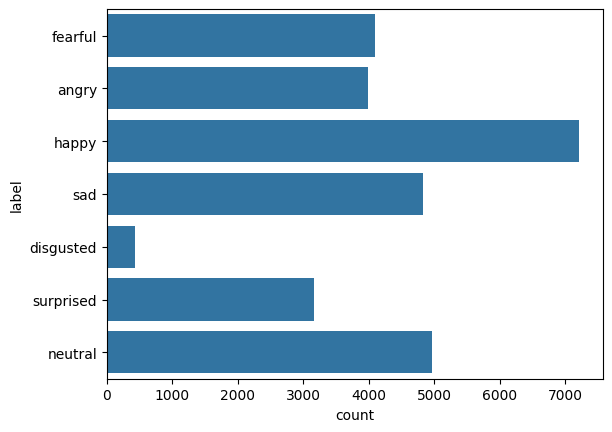

In [16]:
sns.countplot(train['label'])

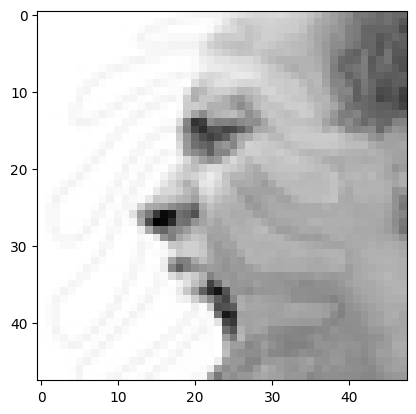

In [17]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

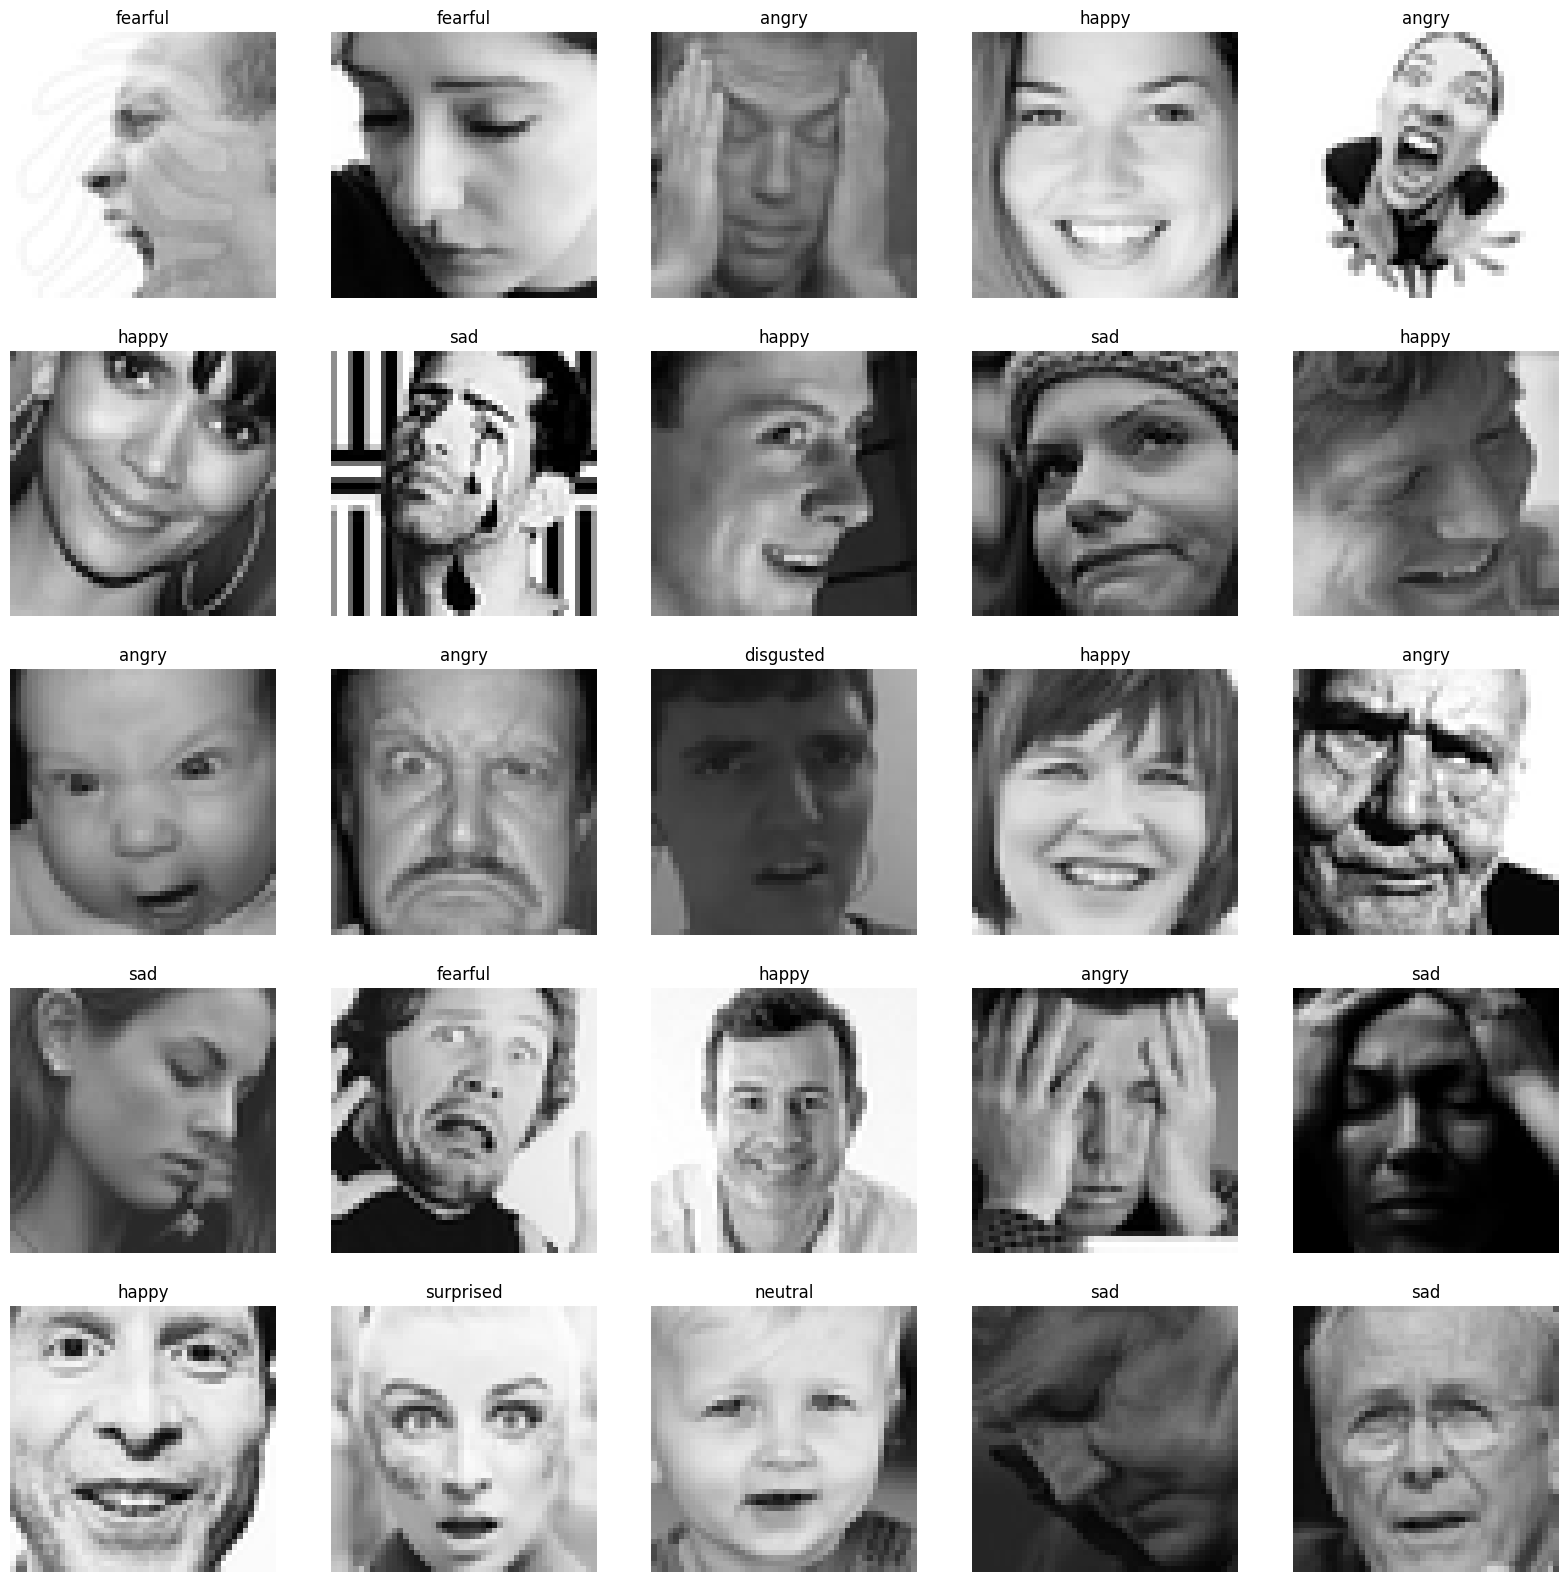

In [18]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [21]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [22]:
train_features = extract_features(train['image'])


  0%|          | 0/28709 [00:00<?, ?it/s]

In [23]:
test_features = extract_features(test['image'])


  0%|          | 0/7178 [00:00<?, ?it/s]

In [24]:
x_train = train_features/255.0
x_test = test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [27]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.])

In [28]:
input_shape = (48, 48, 1)
output_class = 7

In [30]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 188s 835ms/step - accuracy: 0.2498 - loss: 1.8188 - val_accuracy: 0.2573 - val_loss: 1.7878
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 183s 815ms/step - accuracy: 0.2711 - loss: 1.7652 - val_accuracy: 0.3264 - val_loss: 1.6427
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 175s 778ms/step - accuracy: 0.3506 - loss: 1.6351 - val_accuracy: 0.4493 - val_loss: 1.4285
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 169s 753ms/step - accuracy: 0.4232 - loss: 1.5024 - val_accuracy: 0.4746 - val_loss: 1.3535
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 880ms/step - accuracy: 0.4501 - loss: 1.4276 - val_accuracy: 0.4896 - val_loss: 1.3113
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 173s 770ms/step - accuracy: 0.4748 - loss: 1.3709 - val_accuracy: 0.5107 - val_loss: 1.2750
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 188s 838ms/step - accuracy: 0.4895 - loss: 1.3324 - val_accuracy: 0.5194 - val_loss: 1.2459
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.4942 - lo

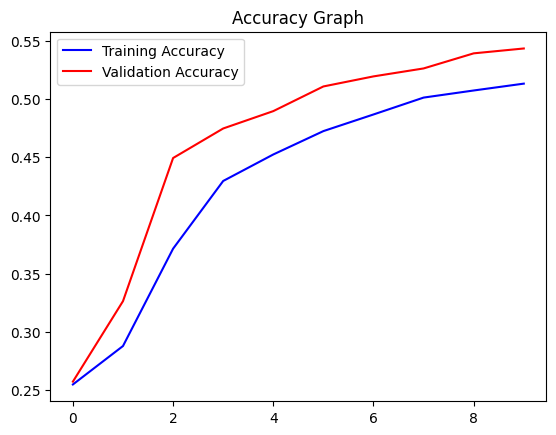

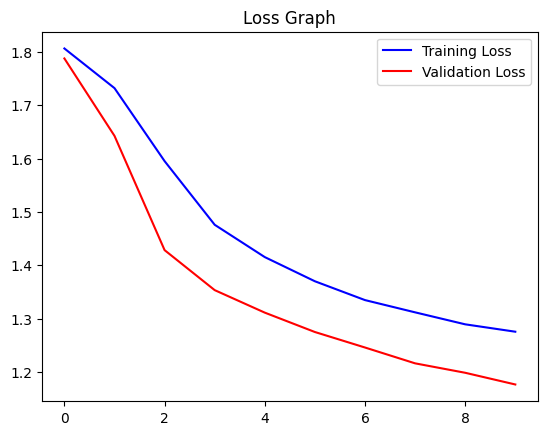

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Output: surprised


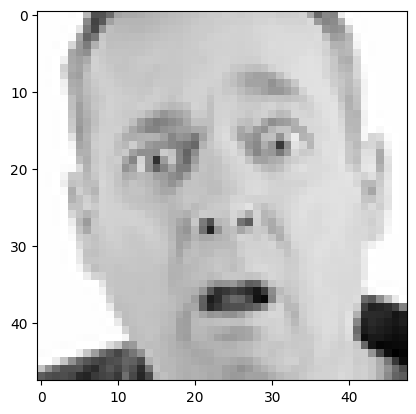

In [34]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Output: angry


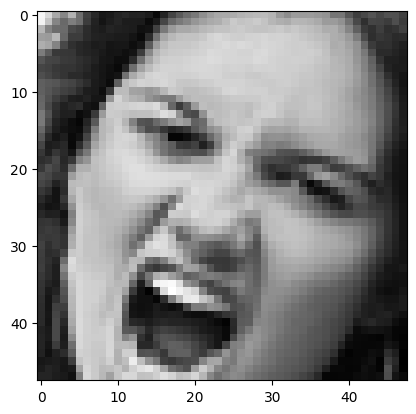

In [35]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Output: neutral


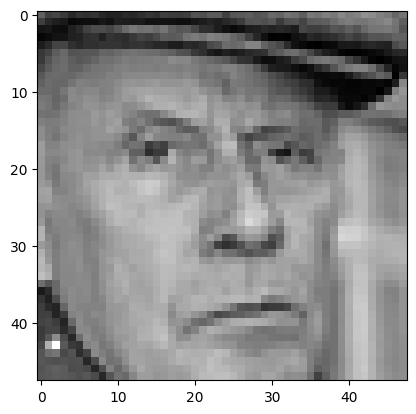

In [36]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');